In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
# This loads our iris data into a numpy array
iris = load_iris()

In [3]:
# We like working in pandas so we convert and label our columns
irisdf = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Let's describe our data
irisdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [5]:
# Now let's normalize our data and describe it again
# Import our library
from sklearn.preprocessing import MinMaxScaler
# Scale our data using minmax normalization
scaler = MinMaxScaler()
irisnormdf = pd.DataFrame(scaler.fit_transform(irisdf), columns = irisdf.columns)
# Let's now restore our target values
irisnormdf.target = irisnormdf.target * 2
# Now let's display our normalized dataframe
display(irisnormdf)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [6]:
# Let's describe our data once again
irisnormdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46,1.00
std,0.23,0.18,0.30,0.32,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08,0.00
50%,0.42,0.42,0.57,0.50,1.00
75%,0.58,0.54,0.69,0.71,2.00
max,1.00,1.00,1.00,1.00,2.00


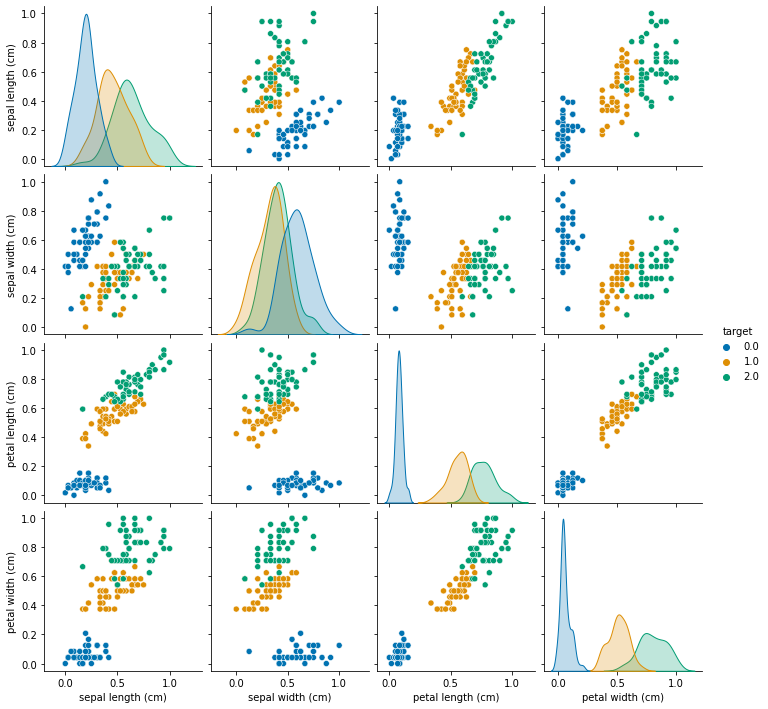

In [7]:
# Let's generate a pairplot and set our target labels as the hue, and use the colorblind colors
sns.pairplot(irisnormdf, hue='target', palette='colorblind')

<AxesSubplot:>

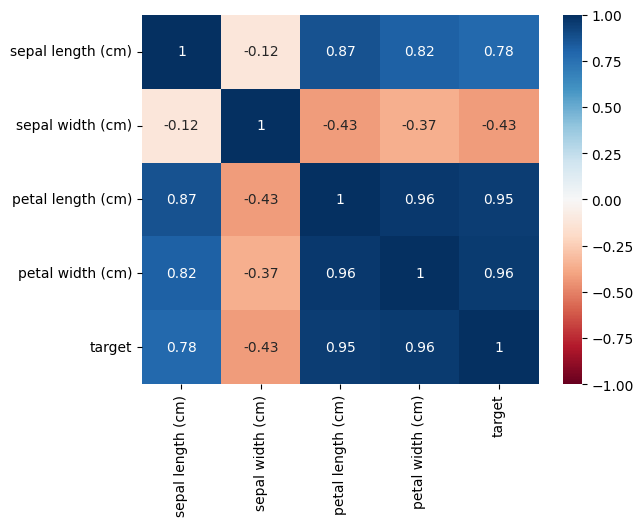

In [8]:
# Let's continue exploring our data by doing a heatmap of our correlation matrix called corr
corr = irisnormdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [9]:
# Let's remove species 2
petalsdf = irisnormdf[irisnormdf.target !=2][['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
petalsy = irisnormdf[irisnormdf.target !=2].target
display(petalsy.unique())

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
95,0.542373,0.458333
96,0.542373,0.500000
97,0.559322,0.500000
98,0.338983,0.416667


array([0., 1.])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

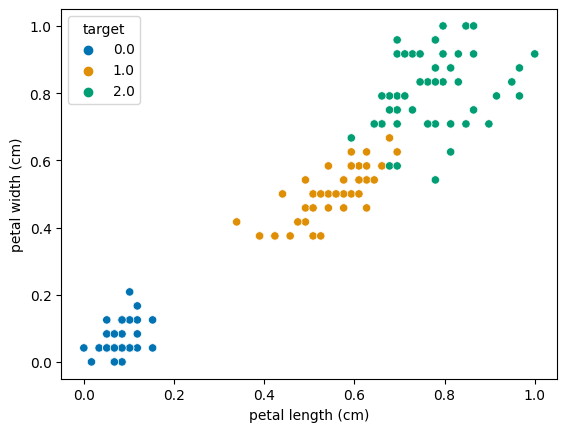

In [10]:
sns.scatterplot(data = irisnormdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = irisnormdf.target, palette='colorblind')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

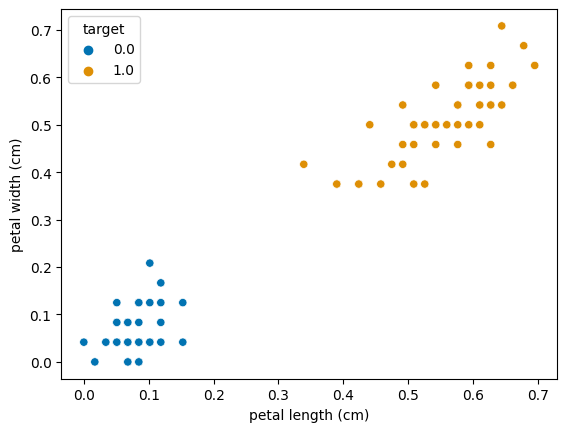

In [12]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = petalsy, palette='colorblind')

The problem above is we overlap with data, so we at least need to find a line and margin that doesn't overlap the data and instead touches on the boundaries of the points

### [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [13]:
# import our KNN libraries
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, petalsy, test_size=0.30)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yhat = knn.predict(X_test)
display(yhat)

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.])

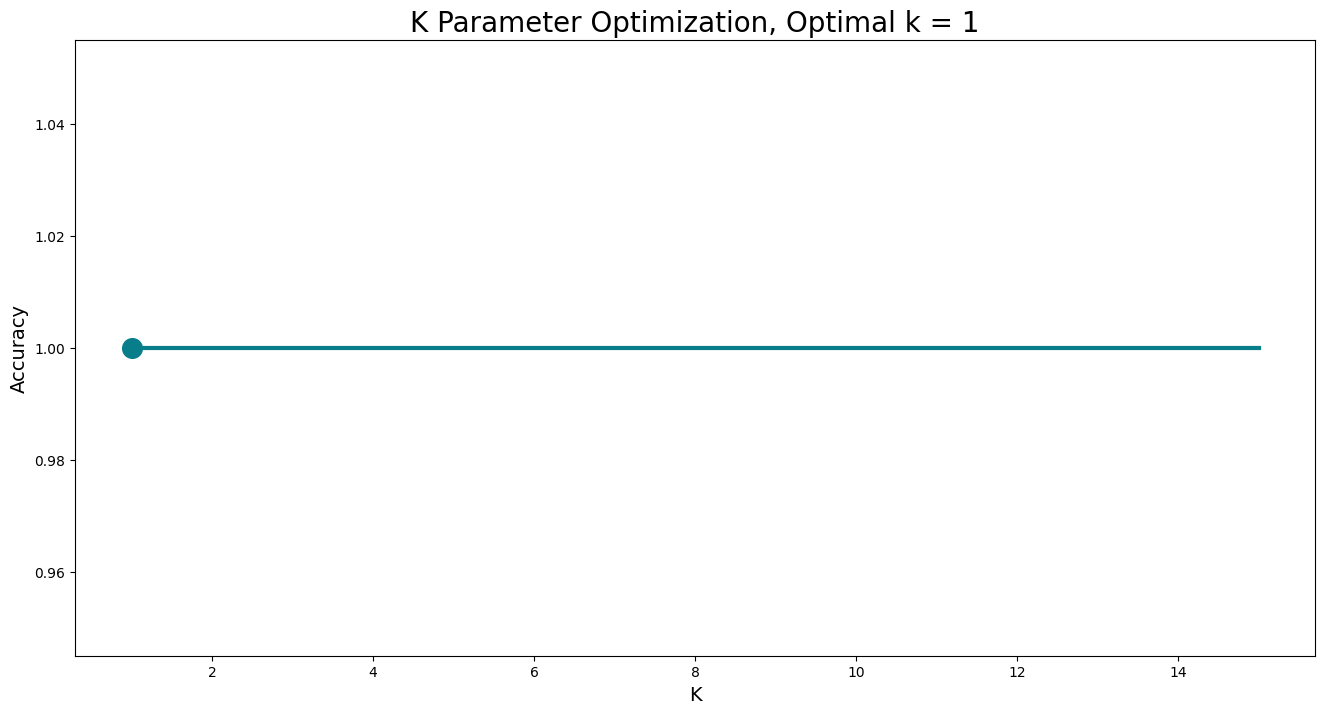

In [20]:
from sklearn.metrics import accuracy_score
evals = []

for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    yhat_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat_test)
    evals.append({'k': k, 'accuracy': accuracy})

evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

### import and print [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
#### [Display Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [23]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat, labels=knn.classes_)
display(myconfusionmatrix)

array([[16,  0],
       [ 0, 14]])

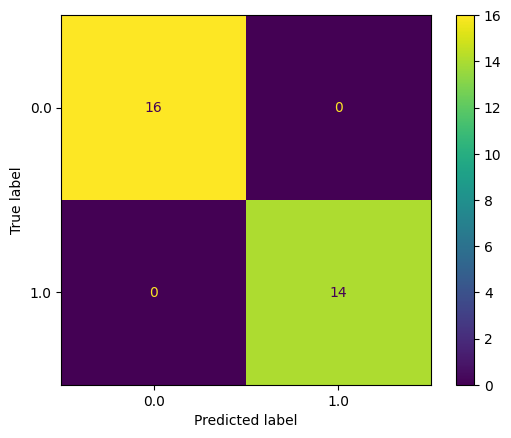

In [24]:
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=knn.classes_)
mycmdisp.plot()

#### Print [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#### Watch a [video](https://www.youtube.com/watch?v=jJ7ff7Gcq34) on precision, recall and f1-score

In [25]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Print [classification score](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

In [26]:
knn.score(X_test,y_test)

1.0

#### Create a [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) using meshteps of 0.02 of our SVM

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

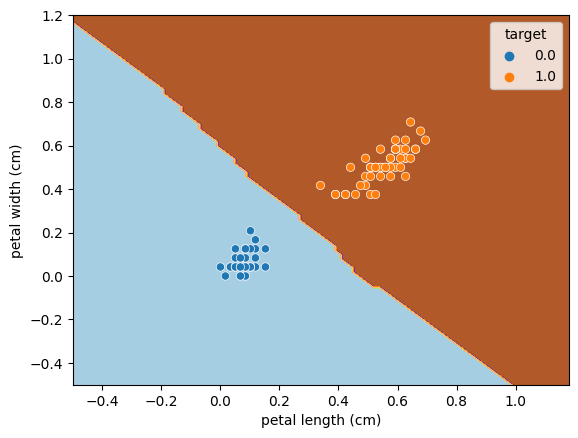

In [28]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = petalsy)

## All Data

In [31]:
petalsdf = irisnormdf[['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
petalsy = irisnormdf.target
display(petalsy.unique())

X_train, X_test, y_train, y_test = train_test_split(petalsdf, petalsy, test_size=0.30)

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


array([0., 1., 2.])

array([1., 2., 0., 1., 2., 2., 0., 0., 0., 0., 0., 1., 0., 1., 2., 2., 0.,
       0., 2., 1., 1., 0., 2., 0., 2., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 2., 0., 1., 0., 1., 0., 0.])

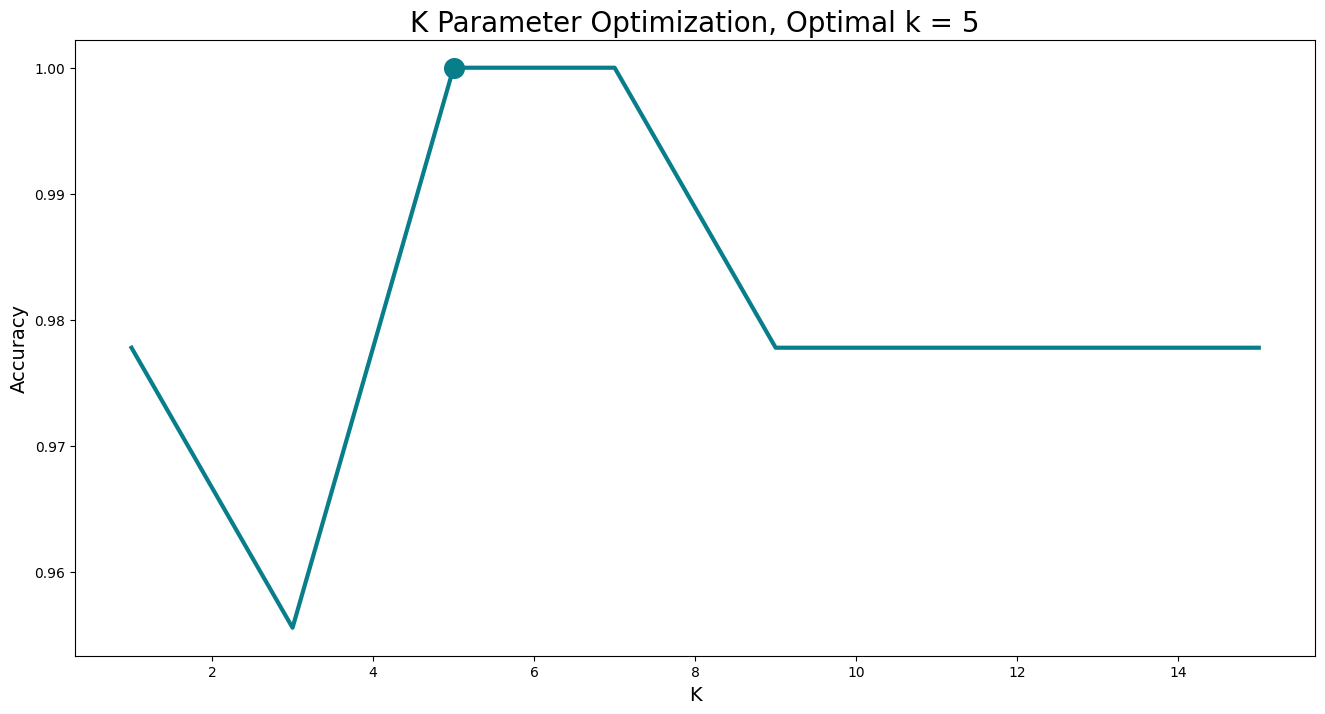

In [32]:
from sklearn.metrics import accuracy_score
evals = []

for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    yhat_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat_test)
    evals.append({'k': k, 'accuracy': accuracy})

evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

array([[22,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  9]])

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      0.93      0.96        14
         2.0       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

1.0


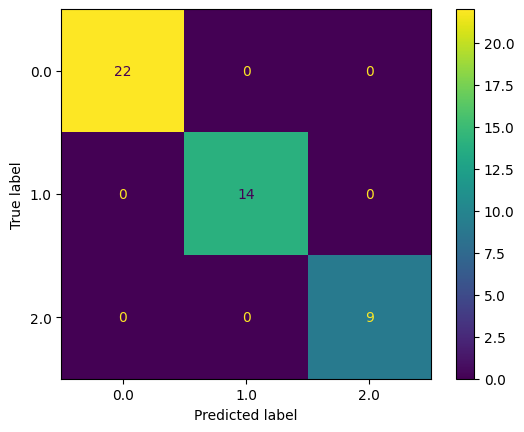

In [37]:
# Use best k
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
yhat = knn.predict(X_test)

myconfusionmatrix = confusion_matrix(y_test, yhat, labels=knn.classes_)
display(myconfusionmatrix)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=knn.classes_)
mycmdisp.plot()
print(classification_report(y_test, yhat_test))
print(knn.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

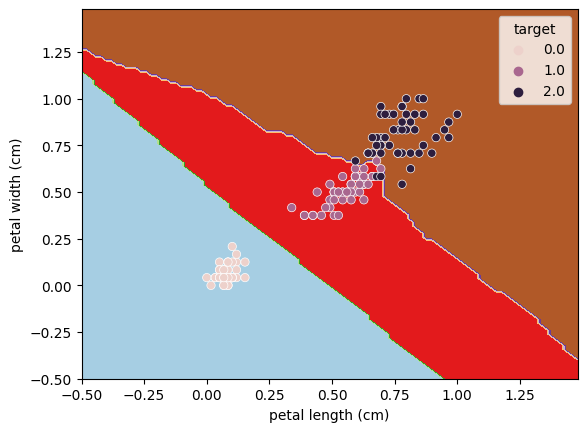

In [38]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = petalsy)

## PCA

#### Docs on [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
#### create a [matplotlib 3d plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
#### Docs on matplotlib colormaps [maplotlib.cm](https://matplotlib.org/stable/api/cm_api.html)
#### Gallery of differet matplotlib [colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [47]:
from sklearn import decomposition
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [51]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
np.random.seed(5)

In [58]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
pd.DataFrame(X).describe()

,0,1,2
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.842171e-16,-5.921189e-18,-8.881784e-18
std,2.056269e+00,4.926162e-01,2.796596e-01
min,-3.223804e+00,-1.265971e+00,-6.941468e-01
25%,-2.530348e+00,-3.254152e-01,-2.054996e-01
50%,5.546193e-01,-2.215678e-02,1.639215e-02
75%,1.550143e+00,3.249152e-01,1.758214e-01
max,3.795645e+00,1.374165e+00,7.601654e-01


In [57]:
display(X)

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

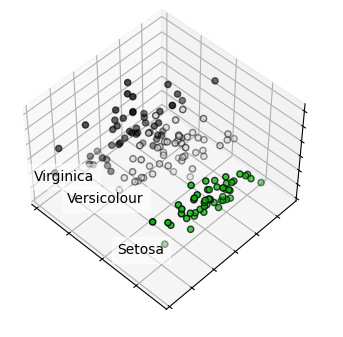

In [49]:
# time to plot!
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()